<a href="https://colab.research.google.com/github/GitOlivier10/biodiversity-starter/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Config espace

In [34]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kendalltau, spearmanr
from scipy.stats import skew

In [35]:
import pandas as pd

# URL du fichier observations.csv sur GitHub pointing to the raw data file
observations_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/observations.csv"

# Importer le fichier CSV
observations_csv = pd.read_csv(observations_url)

# Afficher les données
display(observations_csv)

# URL du fichier species_info.csv sur GitHub pointing to the raw data file
species_info_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/species_info.csv"

# Importer le fichier CSV
species_info_csv = pd.read_csv(species_info_url)

# Afficher les données
display(species_info_csv)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [36]:
import pandas as pd

# URL du fichier observations.csv sur GitHub
observations_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/observations.csv"

# Importer le fichier CSV
observations_csv = pd.read_csv(observations_url)

# Afficher les données
display(observations_csv)

# URL du fichier species_info.csv sur GitHub
species_info_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/species_info.csv"

# Importer le fichier CSV
species_info_csv = pd.read_csv(species_info_url)

# Afficher les données
display(species_info_csv)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [48]:
df_merged = observations_csv.merge(species_info_csv, on='scientific_name', how='inner')
display(df_merged)


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,NaN
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,NaN
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,NaN
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,NaN


Exploration de Observations

In [37]:
display(observations_csv)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [38]:
print(observations_csv.columns)
print()
print(observations_csv.dtypes)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

scientific_name    object
park_name          object
observations        int64
dtype: object


In [39]:
for column in observations_csv:
    print(observations_csv[column].unique())
    print()
print(len(observations_csv['scientific_name'].unique()))

['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

[ 68  77 138  84  85 112 228  39 168 250 103 114 101 279  72  65 143 165
 150  80  83 109 158 167 135 247  73 261 177 117  79  96 140 116 239 262
  71 176 148  76 235 283  25 246  64 281  88  67 254 152 147 213 265 107
 156  47 157  89 154 127 106  75  36 137 244  63 214  92 108  54 105 115
  98 223  82  90 218  58  59  48 208  95  70 100  49  56 134  91  86 136
 257 123 263 118 258 252  27  74  94 132  57 282 110 253 267 230 124 131
 164 260 119 233 245  60 151  66 206 189 242 111 120 243 276 237  29 220
 266 166  53 240  55 215 125  99 199 128 232 251 269 163  93 241 122  69
  97 149 141 142 216 113 145  43 229 234 153 212 172 146 291 160 188 256
 129 227 264 192 159 139 144  34 236  81  78 174  45 201 155 133 249 219
 238 161  52 130  61 1

In [40]:
print(observations_csv.isna().sum())

scientific_name    0
park_name          0
observations       0
dtype: int64


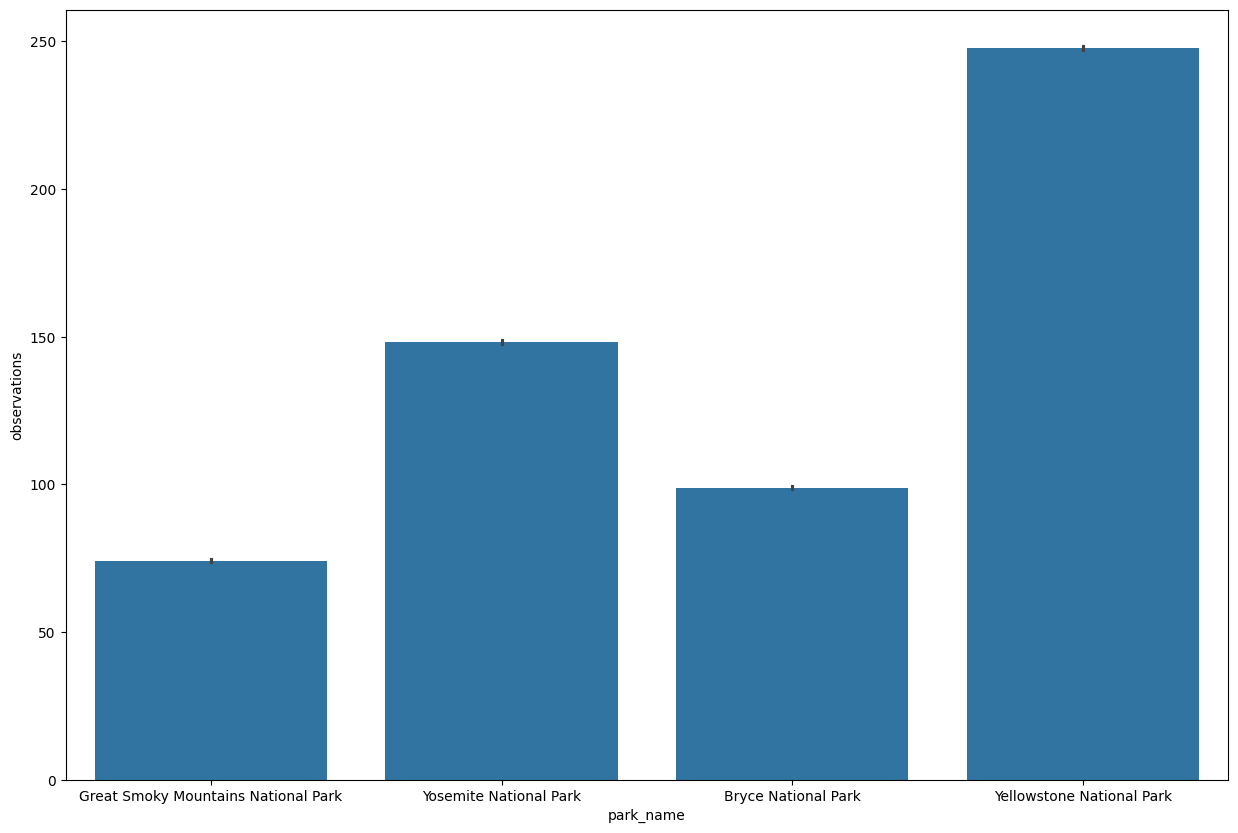

In [50]:
y = df_merged['observations'].groupby(df_merged['park_name']).sum()
x = df_merged['park_name'].unique()

plt.figure(figsize=(15, 10))
sns.barplot(data = df_merged, x = 'park_name', y = 'observations')
plt.xticks(rotation=0)
plt.show()

Exploration de Species_Info

In [42]:
display(species_info_csv)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [43]:
print(species_info_csv.columns)
print()
print(species_info_csv.dtypes)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [44]:
for column in species_info_csv:
    print(species_info_csv[column].unique())
    print()

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']

["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']



In [45]:
print(species_info_csv.isna().sum())

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


What is the distribution of conservation_status for animals?

Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status significant?

Which species were spotted the most at each park?